<a href="https://colab.research.google.com/github/Gopika-S-Nair/Real-World-Problems-using-Machine-Learning-Algorithms/blob/main/Air%20Quality%20Analysis/Air_Quality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIR QUALITY ANALYSIS
**TOPIC** : Air Quality Analysis using Machine Learning Algorithm.

**DOMAIN** : Environment Air Quality


**DATASET** :

* The dataset used in this project is taken from the UCI Machine Learning Repository. It has about 10,000 rows and 15 columns.

* TThis dataset contains the responses of a gas multisensor device.

* The device was placed on the field in a significantly polluted area, at road level, in an Italian city. Data were recorded from March 2004 to February 2005

* Missing values are tagged with -200 value.

**FEATURES**

- CO(GT) :	True hourly averaged concentration CO in mg/m^3 (reference analyzer)


- PT08.S1(CO)	PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

- NMHC(GT)	Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)


- C6H6(GT)	True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)


- PT08.S2(NMHC)	PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)


- NOx (GT)	True hourly averaged NOx concentration in ppb (reference analyzer)


- PT08.S3(NOx)	PT08.S3 (tungsten oxide) hourly averaged sensor response


- NO2(GT)	True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)


- PT08.S4(NO2)	PT08.S4 (tungsten oxide) hourly averaged sensor response


- PT08.S5(O3)	PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)


- T	Temperature in Â°C


- RH	Relative Humidity (%)


- AH	AH Absolute Humidity

## IMPORTING NECESSARY LIBRARIES

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTING RAW DATA

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AirQualityUCI_updated.xlsx to AirQualityUCI_updated.xlsx


## DATAFRAME CONVERSION

In [3]:
df=pd.read_excel('AirQualityUCI_updated.xlsx')
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


## SHALLOW COPY

We are creating a shallow copy of the dataset for future reference in case of loss of data.

In [36]:
df_copy = df.copy()
df_copy

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


## DATA PREPROCESSING : EDA (EXPLORATORY DATA ANALYSIS)

In [9]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [10]:
df.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [11]:
df.shape

(9357, 13)

In [12]:
df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 950.4 KB


In [14]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


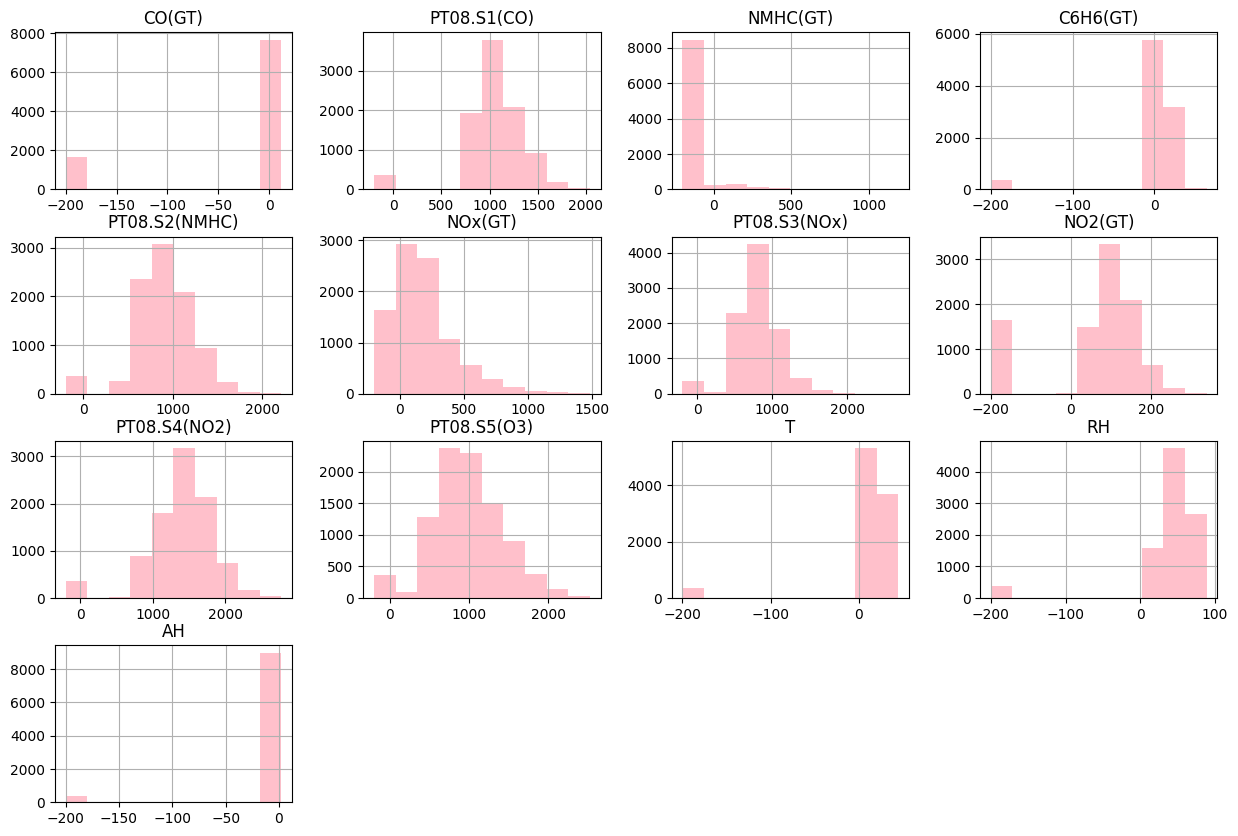

In [59]:
# histogram to check distribution of data
df.hist(figsize = (15,10), color = 'pink')
plt.show()

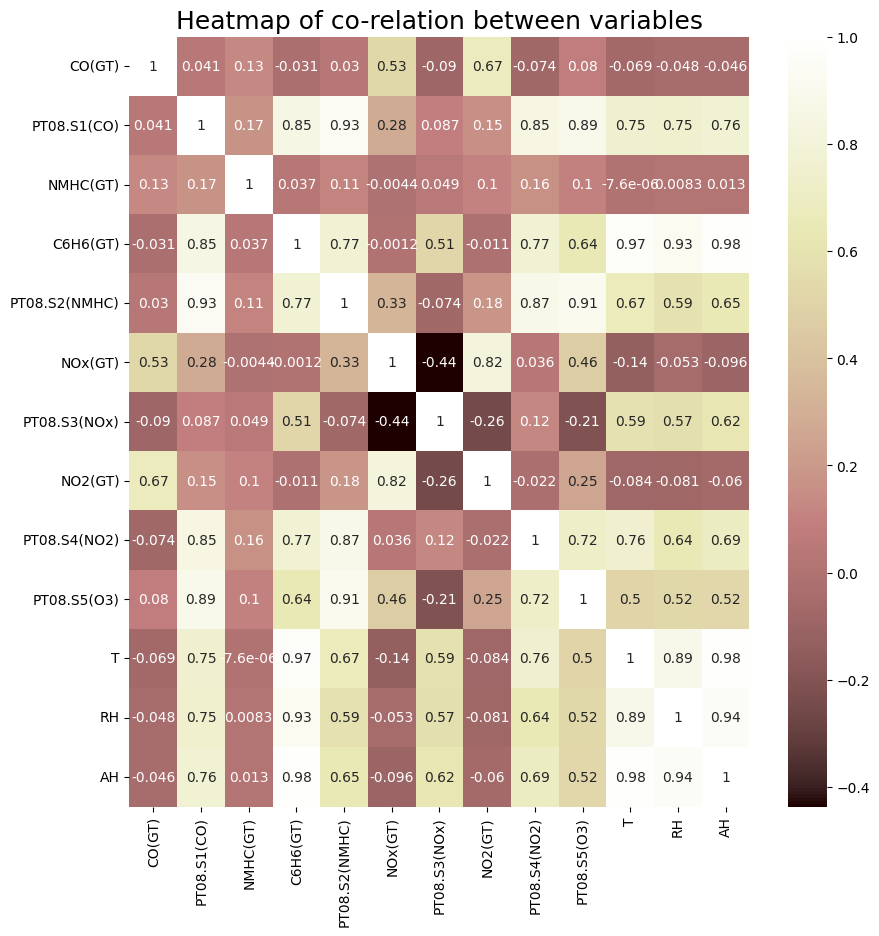

In [54]:
# heatmap to see corelation between variables
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, cmap='pink')
plt.title('Heatmap of co-relation between variables', fontsize=18)
plt.show()

## DATA CLEANING (CHECKING FOR NULL VALUES)


In [15]:
df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

### Since the dataframe does not have any null values, we do not need to do data cleaning.

## X Y SPLIT

In [16]:
x = df.drop(['AH'], axis = 1).values
y = df['AH'].values

In [17]:
x.shape

(9357, 12)

In [18]:
y.shape

(9357,)

##STANDARDIZATION

In [60]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(x)

array([[ 0.4739999 ,  0.94339273,  2.21123554, ...,  0.64029229,
         0.08850233,  0.18337935],
       [ 0.46627322,  0.73796482,  1.93938293, ..., -0.00591277,
         0.08155806,  0.16043589],
       [ 0.46884878,  1.07074288,  1.76768654, ...,  0.21678449,
         0.04915151,  0.28296361],
       ...,
       [ 0.47142434,  0.28238484, -0.29267014, ...,  0.25618056,
         0.39636464, -0.41266181],
       [ 0.467561  , -0.14059957, -0.29267014, ..., -0.44911861,
         0.4293499 , -0.50638818],
       [ 0.46884878,  0.06634442, -0.29267014, ..., -0.34789258,
         0.43340073, -0.51468687]])


## TRAIN TEST SPLIT

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.20, random_state=7)

In [62]:
x_train.shape

(7485, 12)

In [63]:
y_train.shape

(7485,)

In [64]:
x_test.shape

(1872, 12)

In [65]:
y_test.shape

(1872,)

## MODEL BUILDING


**The target variable Absolute Humidity (AH) is a continuous value and there are multiple dependent variables. So I have used Multi Linear Regression Algorithm.**

In [66]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

## PREDICTION

In [67]:
y_predict = mlr.predict(x_test)

In [68]:
y_predict

array([ 1.11601122,  0.56642064,  1.95332507, ..., -0.56262588,
        0.00200221,  0.36147042])

In [69]:
y_test

array([1.19646697, 0.51136445, 0.47139557, ..., 0.60376822, 0.87554876,
       1.05514986])

## EVALUATION

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predict)
mae

0.7607941004347298

In [71]:
mse = mean_squared_error(y_test, y_predict)
mse

1.1650163396217834

In [72]:
rmse = np.sqrt(mse)
rmse

1.079359226403232

In [73]:
lrmse = np.log(rmse)
lrmse

0.07636755617286593

In [74]:
r2 = r2_score(y_test, y_predict)
r2

0.9992953422108135